## Cargamos datos y modelos, y probamos contra test

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
# Agregar el directorio 'src/notebooks' al sys.path
module_path = os.path.abspath(os.path.join('..', 'utils'))
if module_path not in sys.path:
    sys.path.append(module_path)

import funtions_import_merge as preprocess

import importlib

from sklearn import metrics

import pickle

In [19]:
# Recargamos el módulo de funciones para evitar errores en Jupyter notebook
importlib.reload(preprocess)

<module 'funtions_import_merge' from 'c:\\Users\\josea\\github\\S2_ML_LAI_Estimation\\src\\utils\\funtions_import_merge.py'>

In [20]:
file_name_sat = 'S2_SR_USA_2017_2024_SCL.csv'
file_name_insitu = 'NEON_LAI_USA_2017_2024.csv'

### 1. Datos de satelite

Cargamos el dataset de adquisiciones de satelite

In [21]:
df_sat = preprocess.satellite_import(file_name_sat)
df_sat.head(5)

,id,longitude,latitude,time,B1,B2,B3,B4,B5,B6,...,B8,B8A,B9,B11,B12,SCL,QA10,QA20,QA60,Site_sat
23,20190128T154519_20190128T154758_T19TCJ,-71.287337,44.063892,2019-01-28 15:50:57.000,447.0,0.0543,0.0520,0.0584,0.0665,0.1536,...,0.2460,0.2054,2135.0,0.0793,0.0550,4.0,0.0,0.0,0,Bartlett Experimental Forest
24,20190128T154519_20190128T154758_T18TYP,-71.287337,44.063892,2019-01-28 15:51:01.000,240.0,0.0251,0.0346,0.0358,0.0649,0.1531,...,0.2365,0.2108,2132.0,0.0815,0.0570,4.0,0.0,0.0,0,Bartlett Experimental Forest
33,20190222T154241_20190222T154730_T19TCJ,-71.287337,44.063892,2019-02-22 15:50:52.000,592.0,0.0642,0.0854,0.0816,0.0890,0.1784,...,0.2199,0.2268,2616.0,0.1014,0.0616,4.0,0.0,0.0,0,Bartlett Experimental Forest
34,20190222T154241_20190222T154730_T18TYP,-71.287337,44.063892,2019-02-22 15:50:56.000,457.0,0.0438,0.0541,0.0619,0.0842,0.1787,...,0.1845,0.2290,2654.0,0.1034,0.0623,4.0,0.0,0.0,0,Bartlett Experimental Forest
63,20190508T153819_20190508T154933_T19TCJ,-71.287337,44.063892,2019-05-08 15:51:05.057,294.0,0.0388,0.0560,0.0564,0.0942,0.1683,...,0.2432,0.2120,2289.0,0.1615,0.0985,4.0,0.0,0.0,0,Bartlett Experimental Forest


### 2. Datos de campo

Cargamos el dataset de medidas insitu.

In [22]:
df_insitu = preprocess.insitu_import(file_name_insitu)
df_insitu.head(5)

,GBOV_ID,Site,GROUND_DATA_PI,GROUND_DATA_PIs_Email,GBOV_Email,Network,Elevation,IGBP_class,Lat_IS,Lon_IS,...,clumping_Miller_down,clumping_Warren_down,clumping_Miller_up_err,clumping_Warren_up_err,clumping_Miller_down_err,clumping_Warren_down_err,Warren_up_flag,Warren_down_flag,LAI_Warren,LAI_Warren_err
0,GBOV_RM7_958,Bartlett Experimental Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,232,Mixed Forest,44.063901,-71.287308,...,0.870976,0.914188,0.020388,0.045145,0.086048,0.119765,0.0,0.0,4.694303,0.223188
1,GBOV_RM7_979,Bartlett Experimental Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,232,Mixed Forest,44.063901,-71.287308,...,0.899206,0.927963,0.018524,0.039834,0.069546,0.129738,0.0,0.0,5.519208,0.234041
2,GBOV_RM7_910,Bartlett Experimental Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,232,Mixed Forest,44.063901,-71.287308,...,0.848925,0.909968,0.017414,0.039298,0.075073,0.126795,0.0,0.0,5.537547,0.248315
3,GBOV_RM7_934,Bartlett Experimental Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,232,Mixed Forest,44.063901,-71.287308,...,0.953405,0.961113,0.019804,0.040532,0.065676,0.131289,0.0,0.0,4.671072,0.204766
4,GBOV_RM7_973,Bartlett Experimental Forest,Courtney Meier,cmeier@battelleecology.org,support-copernicus-gbov@acri-st.fr,NEON,232,Mixed Forest,44.063901,-71.287308,...,0.888029,0.906574,0.017908,0.037853,0.075053,0.123742,0.0,0.0,4.559653,0.205287


### 3. Combinación de los datasets

**Merge de data sets**. Para cada site identificamos las medidas in_situ mas cercanas a la fecha de adquisicion del satélite

In [23]:
df_cross = preprocess.merge_datasets(df_sat,df_insitu)
df_cross.head(5)

,id,longitude,latitude,time,B1,B2,B3,B4,B5,B6,...,clumping_Warren_up_err,clumping_Miller_down_err,clumping_Warren_down_err,Warren_up_flag,Warren_down_flag,LAI_Warren,LAI_Warren_err,delta,date_sat,date_insitu
0,20190607T153819_20190607T154303_T18TYN,-72.171458,42.537834,2019-06-07 15:51:23.000,166.0,0.0198,0.0532,0.0169,0.0982,0.3507,...,0.04,0.09,0.15,0.0,0.0,4.030,0.170,3 days 10:17:23,2019-06-07,2019-06-04
1,20190627T153819_20190627T154123_T18TYN,-72.171458,42.537834,2019-06-27 15:51:23.000,233.0,0.0236,0.0405,0.0193,0.0782,0.3244,...,0.04,0.10,0.19,0.0,0.0,4.820,0.220,4 days 13:44:37,2019-06-27,2019-07-02
2,20190712T153911_20190712T154425_T18TYN,-72.171458,42.537834,2019-07-12 15:51:20.431,288.0,0.0197,0.0203,0.0126,0.0247,0.0888,...,0.04,0.11,0.18,0.0,0.0,3.871,0.195,3 days 13:53:39.569000,2019-07-12,2019-07-16
3,20190801T153911_20190801T154113_T18TYN,-72.171458,42.537834,2019-08-01 15:51:19.875,228.0,0.0176,0.0422,0.0188,0.0757,0.3112,...,0.04,0.10,0.21,0.0,0.0,4.220,0.190,2 days 09:45:19.875000,2019-08-01,2019-07-30
4,20190826T153819_20190826T154455_T18TYN,-72.171458,42.537834,2019-08-26 15:51:19.743,174.0,0.0204,0.0405,0.0182,0.0711,0.2746,...,0.05,0.06,0.09,0.0,0.0,4.281,0.219,0 days 14:23:40.257000,2019-08-26,2019-08-27


### Definimos X_test y y_test

Elegimos fechas del dataset. Nos quedamos con los datos del 2023

In [24]:
test_set = df_cross[pd.to_datetime(df_cross['date_insitu']) >= pd.to_datetime('2023-01-01')].copy()

Definimos X_train & y_train

In [25]:
X_test = test_set.drop('LAI_Warren', axis=1)
y_test = test_set['LAI_Warren']

In [26]:
# Recuperamos el modelo de pipelines (version pickle)
with open('../models/modelo_pipeline.pkl', 'rb') as archivo:
    modelo_pipeline = pickle.load(archivo)


In [27]:
modelo_pipeline

Pipeline(steps=[('pipe_exclude_columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('excluye', 'drop',
                                                  ['id', 'longitude',
                                                   'latitude', 'time', 'B1',
                                                   'B9', 'SCL', 'QA10', 'QA20',
                                                   'QA60', 'Site_sat',
                                                   'GBOV_ID', 'Site',
                                                   'GROUND_DATA_PI',
                                                   'GROUND_DATA_PIs_Email',
                                                   'GBOV_Email', 'Network',
                                                   'Elevation', 'IGBP_class',
                                                   'Lat_IS', 'Lon_IS',
                                                   'TIME_IS', 'Version',
                                                   'up_flag', 'down_flag',
                                                   'LAI_Miller_up',
                                                   'LAI_Warren_up',
                                                   'LAIe_Miller_up',
                                                   'LAIe_Warren_up',
                                                   'LAI_Miller_down', ...])])),
                ('SScaler', StandardScaler()), ('Modelo', LinearRegression())])

### Prueba modelo contra test

In [28]:
y_pred = modelo_pipeline.predict(X_test)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', modelo_pipeline.score(X_test, y_test))

MSE: 1.0166304615200963
RMSE: 1.008280943745391
MAE: 0.7837591539205606
MAPE: 0.5853665357750443
R2: 0.7292879398744896


In [29]:
df_result = pd.DataFrame(y_test)
df_result['pred'] = y_pred
df_result['Class'] = test_set['IGBP_class']

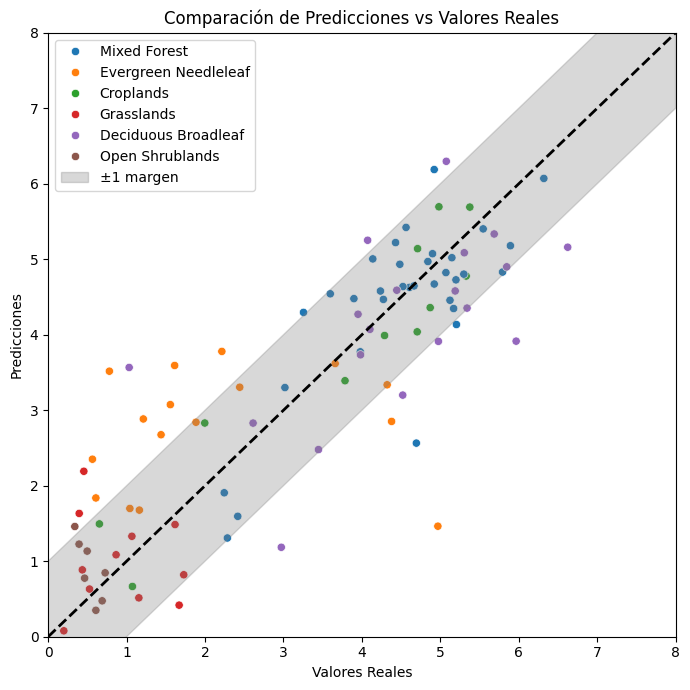

In [30]:
plt.figure(figsize=(7, 7))

# Scatter plot
sns.scatterplot(data=df_result, x="LAI_Warren", y="pred", hue="Class")

# Línea de identidad
x_vals = [0, 8]
plt.plot(x_vals, x_vals, 'k--', lw=2)

# Sombra entre y = x - 1 y y = x + 1
plt.fill_between(x_vals,
                 [x - 1 for x in x_vals],
                 [x + 1 for x in x_vals],
                 color='gray', alpha=0.3, label='±1 margen')

plt.xlim(0, 8)
plt.ylim(0, 8)
#plt.axis('square')

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.legend()

# Mover la leyenda fuera del gráfico
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()  # Ajusta automáticamente para que no se corte nada

plt.show()
